In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path

%matplotlib inline


In [241]:
# file[14:19] extracts the year from the filename; to be used in the tax_files dict to deal with differences
# in formatting between files

path = os.getcwd() + '\data_sources\demand\CA_tax_returns\\'
tax_files = {}
for file in os.listdir(path):
    tax_files[int(file[14:19])] = path+file
tax_files

{2007: 'C:\\Users\\Hector\\Desktop\\capstone 1\\data_sources\\demand\\CA_tax_returns\\CA tax returns 2007.xls',
 2008: 'C:\\Users\\Hector\\Desktop\\capstone 1\\data_sources\\demand\\CA_tax_returns\\CA tax returns 2008.xls',
 2009: 'C:\\Users\\Hector\\Desktop\\capstone 1\\data_sources\\demand\\CA_tax_returns\\CA tax returns 2009.xls',
 2010: 'C:\\Users\\Hector\\Desktop\\capstone 1\\data_sources\\demand\\CA_tax_returns\\CA tax returns 2010.xls',
 2011: 'C:\\Users\\Hector\\Desktop\\capstone 1\\data_sources\\demand\\CA_tax_returns\\CA tax returns 2011.xls',
 2012: 'C:\\Users\\Hector\\Desktop\\capstone 1\\data_sources\\demand\\CA_tax_returns\\CA tax returns 2012.xls',
 2013: 'C:\\Users\\Hector\\Desktop\\capstone 1\\data_sources\\demand\\CA_tax_returns\\CA tax returns 2013.xls',
 2014: 'C:\\Users\\Hector\\Desktop\\capstone 1\\data_sources\\demand\\CA_tax_returns\\CA tax returns 2014.xls'}

In [242]:
# dataset for each year is formatted slightly differently
rows_to_skip = {2014:5, 2013:5, 2012:5, 2011:5, 2010:5, 2009:5, 2008:9, 2007:8}

# column labels change slightly from year to year--we are only interested in the first few columns
# so we will rename those of interest. '0' label is filler to simplify the for loop for renaming later
column_labels = {2014:['zipcode',
                  'gross_income_bracket',
                  'tax_returns_2014',
                  'single_returns_2014',
                  'joint_returns_2014'],
                 2013:['zipcode',
                  'gross_income_bracket',
                  'tax_returns_2013',
                  'single_returns_2013',
                  'joint_returns_2013'],
                 2012:['zipcode',
                  'gross_income_bracket',
                  'tax_returns_2012',
                  'single_returns_2012',
                  'joint_returns_2012'],
                 2011:['zipcode',
                  'gross_income_bracket',
                  'tax_returns_2011',
                  #'single_returns',
                  'joint_returns_2011',
                      '0'],
                 2010:['zipcode',
                  'gross_income_bracket',
                  'tax_returns_2010',
                  #'single_returns',
                  'joint_returns_2010',
                      '0'],
                 2009:['zipcode',
                  'gross_income_bracket',
                  'tax_returns_2009',
                  #'single_returns',
                  'joint_returns_2009',
                      '0'],
                 2008:['gross_income_bracket',
                  'zipcode',
                  'tax_returns_2008',
                  #'single_returns',
                  'joint_returns_2008',
                      '0'],
                 2007:['gross_income_bracket',
                  'zipcode',
                  'tax_returns_2007',
                  #'single_returns',
                  'joint_returns_2007',
                      '0']
                }

In [243]:
# read in all excel files to dict of DataFrames
ca_tax = {}
for year in range(2007,2015):
    ca_tax[year] = pd.read_excel(tax_files[year],skiprows=rows_to_skip[year])

In [244]:
# create dict of dicts to pair columns of interest with their proper descriptive column labels for each year
column_dict = {}

for year in range(2007,2015):
    temp_dict = {}
    i = 0
    for old_label in list(ca_tax[year])[0:5]:
        temp_dict[old_label] = column_labels[year][i]
        i+=1
    column_dict[year] = temp_dict
column_dict

{2007: {'Unnamed: 0': 'gross_income_bracket',
  'Unnamed: 1': 'zipcode',
  -1: 'tax_returns_2007',
  -2: 'joint_returns_2007',
  -3: '0'},
 2008: {'Unnamed: 0': 'gross_income_bracket',
  'Unnamed: 1': 'zipcode',
  -1: 'tax_returns_2008',
  -2: 'joint_returns_2008',
  -3: '0'},
 2009: {'Unnamed: 0': 'zipcode',
  'Unnamed: 1': 'gross_income_bracket',
  -1: 'tax_returns_2009',
  -2: 'joint_returns_2009',
  -3: '0'},
 2010: {'Unnamed: 0': 'zipcode',
  'Unnamed: 1': 'gross_income_bracket',
  -1: 'tax_returns_2010',
  -2: 'joint_returns_2010',
  -3: '0'},
 2011: {'Unnamed: 0': 'zipcode',
  'Unnamed: 1': 'gross_income_bracket',
  -1: 'tax_returns_2011',
  -2: 'joint_returns_2011',
  -3: '0'},
 2012: {'Unnamed: 0': 'zipcode',
  'Unnamed: 1': 'gross_income_bracket',
  -1: 'tax_returns_2012',
  -2: 'single_returns_2012',
  -3: 'joint_returns_2012'},
 2013: {'Unnamed: 0': 'zipcode',
  'Unnamed: 1': 'gross_income_bracket',
  -1: 'tax_returns_2013',
  -2: 'single_returns_2013',
  -3: 'joint_returns

In [245]:
# to differentiate same columns from different years, for when we join the tables together
rsuffixes = ['_2007','_2008','_2009','_2010','_2011','_2012','_2013','_2014']

In [246]:
# use the dict above to rename desired columns
i = 0
for year in ca_tax:
    ca_tax[year] = ca_tax[year].rename(columns=column_dict[year])
    ca_tax[year] = ca_tax[year][['zipcode','gross_income_bracket','tax_returns'+rsuffixes[i],'joint_returns'+rsuffixes[i]]]
    ca_tax[year] = ca_tax[year].dropna()
    ca_tax[year] = ca_tax[year].replace(to_replace='*',value=0)
    ca_tax[year] = ca_tax[year].replace(to_replace='.',value=0)
    ca_tax[year]['zipcode'] = ca_tax[year]['zipcode'].astype(str)
    ca_tax[year]['tax_returns'+rsuffixes[i]] = ca_tax[year]['tax_returns'+rsuffixes[i]].astype(int)
    ca_tax[year]['joint_returns'+rsuffixes[i]] = ca_tax[year]['joint_returns'+rsuffixes[i]].astype(int)
    i+=1

In [247]:
ca_tax[2007].head(10)

,zipcode,gross_income_bracket,tax_returns_2007,joint_returns_2007
1,0,"Under $10,000",3543445,430558
2,0,"$10,000 under $25,000",3663408,690967
3,0,"$25,000 under $50,000",3834467,1182457
4,0,"$50,000 under $75,000",2129615,1013427
5,0,"$75,000 under $100,000",1310319,835884
6,0,"$100,000 under $200,000",1794378,1394303
7,0,"$200,000 or more",680811,557098
10,90001,"Under $10,000",4995,676
11,90001,"$10,000 under $25,000",7802,1479
12,90001,"$25,000 under $50,000",5549,2065


In [248]:
ca_tax[2007].dtypes

zipcode                 object
gross_income_bracket    object
tax_returns_2007         int32
joint_returns_2007       int32
dtype: object

In [249]:
ca_tax[2008]['gross_income_bracket'][0:7]

1              Under $10,000
2      $10,000 under $25,000
3      $25,000 under $50,000
4      $50,000 under $75,000
5     $75,000 under $100,000
6    $100,000 under $200,000
7           $200,000 or more
Name: gross_income_bracket, dtype: object

In [250]:
labels = ['<$10,000','$10,000-$25,000','$25,000-$50,000','$50,000-$75,000','$75,000-$100,000','$100,000-$200,000','>$200,000']

In [251]:
new_bracket_labels = {}
i = 0
for bracket in ca_tax[2008]['gross_income_bracket'][0:7]:
    new_bracket_labels[bracket] = labels[i]
    i+=1
new_bracket_labels

{'$10,000 under $25,000': '$10,000-$25,000',
 '$100,000 under $200,000': '$100,000-$200,000',
 '$200,000 or more': '>$200,000',
 '$25,000 under $50,000': '$25,000-$50,000',
 '$50,000 under $75,000': '$50,000-$75,000',
 '$75,000 under $100,000': '$75,000-$100,000',
 'Under $10,000': '<$10,000'}

In [252]:
ca_tax[2014]['gross_income_bracket'][0:7]

0                      Total
1           $1 under $25,000
2      $25,000 under $50,000
3      $50,000 under $75,000
4     $75,000 under $100,000
5    $100,000 under $200,000
6           $200,000 or more
Name: gross_income_bracket, dtype: object

In [253]:
# formatting on files changes--manually including new label from recent years
new_bracket_labels['$1 under $25,000'] = '<$25,000'

In [254]:
# fix bracket labels for readability 
for year in ca_tax:
    for old_label in new_bracket_labels:
        ca_tax[year] = ca_tax[year].replace(to_replace=old_label,value=new_bracket_labels[old_label])

In [255]:
# strange formatting error with 2008 when file was read in
# pandas added listed zipcodes as strings with '.0' appended. needed to convert to float, then to int to truncate .0,
# and finally back to str
ca_tax[2008]['zipcode'] = ca_tax[2008]['zipcode'].astype(float)
ca_tax[2008]['zipcode'] = ca_tax[2008]['zipcode'].astype(int)
ca_tax[2008]['zipcode'] = ca_tax[2008]['zipcode'].astype(str)

In [256]:
# initialize master DataFrame with left-most DataFrame
# note: '0' zipcode is the total of all zipcodes listed
ca_tax_master = ca_tax[2007]
ca_tax_master = ca_tax_master.set_index(['zipcode','gross_income_bracket'])
ca_tax_master.head(10)

tax_returns_2007  joint_returns_2007
zipcode gross_income_bracket                                      
0       <$10,000                       3543445              430558
        $10,000-$25,000                3663408              690967
        $25,000-$50,000                3834467             1182457
        $50,000-$75,000                2129615             1013427
        $75,000-$100,000               1310319              835884
        $100,000-$200,000              1794378             1394303
        >$200,000                       680811              557098
90001   <$10,000                          4995                 676
        $10,000-$25,000                   7802                1479
        $25,000-$50,000                   5549                2065

In [257]:
for year in range(2008,2015):
    ca_tax_master = ca_tax_master.join(ca_tax[year].set_index(['zipcode','gross_income_bracket']),how='outer')

In [258]:
ca_tax_master

tax_returns_2007  joint_returns_2007  \
zipcode gross_income_bracket                                         
0       $10,000-$25,000              3663408.0            690967.0   
        $100,000-$200,000            1794378.0           1394303.0   
        $25,000-$50,000              3834467.0           1182457.0   
        $50,000-$75,000              2129615.0           1013427.0   
        $75,000-$100,000             1310319.0            835884.0   
        <$10,000                     3543445.0            430558.0   
        <$25,000                           NaN                 NaN   
        >$200,000                     680811.0            557098.0   
        Total                              NaN                 NaN   
90001   $10,000-$25,000                 7802.0              1479.0   
        $100,000-$200,000                 75.0                54.0   
        $25,000-$50,000                 5549.0              2065.0   
        $50,000-$75,000                 1221.0               696.0   
        $75,000-$100,000                 266.0               185.0   
        <$10,000                        4995.0               676.0   
        <$25,000                           NaN                 NaN   
        >$200,000                         17.0                12.0   
90002   $10,000-$25,000                 6939.0              1139.0   
        $100,000-$200,000                 82.0                58.0   
        $25,000-$50,000                 4493.0              1469.0   
        $50,000-$75,000                 1051.0               529.0   
        $75,000-$100,000                 238.0               150.0   
        <$10,000                        4646.0               418.0   
        <$25,000                           NaN                 NaN   
        >$200,000                          0.0                 0.0   
90003   $10,000-$25,000                 9632.0              1562.0   
        $100,000-$200,000                 93.0                74.0   
        $25,000-$50,000                 5904.0              1960.0   
        $50,000-$75,000                 1230.0               683.0   
        $75,000-$100,000                 264.0               166.0   
...                                        ...                 ...   
96158   <$10,000                         545.0                52.0   
        >$200,000                         53.0                42.0   
96160   $10,000-$25,000                  483.0                66.0   
        $100,000-$200,000                283.0               234.0   
        $25,000-$50,000                  671.0               157.0   
        $50,000-$75,000                  367.0               180.0   
        $75,000-$100,000                 233.0               171.0   
        <$10,000                         446.0                40.0   
        >$200,000                        119.0                97.0   
96161   $10,000-$25,000                  676.0               112.0   
        $100,000-$200,000                695.0               582.0   
        $25,000-$50,000                  824.0               241.0   
        $50,000-$75,000                  580.0               320.0   
        $75,000-$100,000                 461.0               341.0   
        <$10,000                         851.0                73.0   
        <$25,000                           NaN                 NaN   
        >$200,000                        299.0               247.0   
96162   $10,000-$25,000                  352.0                52.0   
        $100,000-$200,000                173.0               146.0   
        $25,000-$50,000                  438.0               118.0   
        $50,000-$75,000                  219.0               124.0   
        $75,000-$100,000                 135.0               100.0   
        <$10,000                         332.0                35.0   
        >$200,000                         56.0                44.0   
99999   $100,000-$200,000               

In [259]:
# to fix the brackets: 2007 and 2008 were formatted with brackets 10,000-25,000 and <10,000
# all years after that use a single bracket: <25,000. sum the 10,000-25,000 and <10,000 brackets to 
# format 2007 and 2008 with brackets that are consistent with the later years
# use the indices together with .loc and a for loop to assign (10,000-25,000 + < 10,000) to <25,000 for 2007 and 2008
# then delete 10,000-25,000 and <10,000

zipcodes_list = ca_tax_master.index.levels[0]
zipcodes_list

Index(['0', '90001', '90002', '90003', '90004', '90005', '90006', '90007',
       '90008', '90009',
       ...
       '96150', '96151', '96152', '96155', '96156', '96158', '96160', '96161',
       '96162', '99999'],
      dtype='object', name='zipcode', length=2402)

In [260]:
# there are zipcodes which do not have the <$25,000 bracket: these are the zipcodes which are not listed in the
# later (2009-2014) years. i.e. when we performed the join, the row was not added because they did not exist
# in the later years, which used the <$25,000 bracket. we will drop these rows (they have a bunch of missing information)
# so we will not bother to fix their brackets
print(len(ca_tax_master.loc['96160']))
ca_tax_master.loc['96160']

7


,tax_returns_2007,joint_returns_2007,tax_returns_2008,joint_returns_2008,tax_returns_2009,joint_returns_2009,tax_returns_2010,joint_returns_2010,tax_returns_2011,joint_returns_2011,tax_returns_2012,joint_returns_2012,tax_returns_2013,joint_returns_2013,tax_returns_2014,joint_returns_2014
gross_income_bracket,,,,,,,,,,,,,,,,
"$10,000-$25,000",483.0,66.0,498.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"$100,000-$200,000",283.0,234.0,287.0,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"$25,000-$50,000",671.0,157.0,621.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"$50,000-$75,000",367.0,180.0,360.0,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"$75,000-$100,000",233.0,171.0,211.0,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"<$10,000",446.0,40.0,416.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
">$200,000",119.0,97.0,82.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
# the for loop runs into an error without the if statement
# we could adjust it to retain and fix information on the <= 7 years, but again, there is no sense 
# in doing this because we are dropping these data-lacking rows
for zc in zipcodes_list:
    if len(ca_tax_master.loc[zc]) > 7:
        under25k2007 = ca_tax_master.loc[zc].loc['$10,000-$25,000']['tax_returns_2007'] + ca_tax_master.loc[zc].loc['<$10,000']['tax_returns_2007']
        ca_tax_master.loc[zc].loc['<$25,000']['tax_returns_2007'] = under25k2007
        under25k2008 = ca_tax_master.loc[zc].loc['$10,000-$25,000']['tax_returns_2008'] + ca_tax_master.loc[zc].loc['<$10,000']['tax_returns_2008']
        ca_tax_master.loc[zc].loc['<$25,000']['tax_returns_2008'] = under25k2008
        under25k2007joint = ca_tax_master.loc[zc].loc['$10,000-$25,000']['joint_returns_2007'] + ca_tax_master.loc[zc].loc['<$10,000']['joint_returns_2007']
        ca_tax_master.loc[zc].loc['<$25,000']['joint_returns_2007'] = under25k2007joint
        under25k2008joint = ca_tax_master.loc[zc].loc['$10,000-$25,000']['joint_returns_2008'] + ca_tax_master.loc[zc].loc['<$10,000']['joint_returns_2008']
        ca_tax_master.loc[zc].loc['<$25,000']['joint_returns_2008'] = under25k2008joint

In [262]:
ca_tax_master

tax_returns_2007  joint_returns_2007  \
zipcode gross_income_bracket                                         
0       $10,000-$25,000              3663408.0            690967.0   
        $100,000-$200,000            1794378.0           1394303.0   
        $25,000-$50,000              3834467.0           1182457.0   
        $50,000-$75,000              2129615.0           1013427.0   
        $75,000-$100,000             1310319.0            835884.0   
        <$10,000                     3543445.0            430558.0   
        <$25,000                     7206853.0           1121525.0   
        >$200,000                     680811.0            557098.0   
        Total                              NaN                 NaN   
90001   $10,000-$25,000                 7802.0              1479.0   
        $100,000-$200,000                 75.0                54.0   
        $25,000-$50,000                 5549.0              2065.0   
        $50,000-$75,000                 1221.0               696.0   
        $75,000-$100,000                 266.0               185.0   
        <$10,000                        4995.0               676.0   
        <$25,000                       12797.0              2155.0   
        >$200,000                         17.0                12.0   
90002   $10,000-$25,000                 6939.0              1139.0   
        $100,000-$200,000                 82.0                58.0   
        $25,000-$50,000                 4493.0              1469.0   
        $50,000-$75,000                 1051.0               529.0   
        $75,000-$100,000                 238.0               150.0   
        <$10,000                        4646.0               418.0   
        <$25,000                       11585.0              1557.0   
        >$200,000                          0.0                 0.0   
90003   $10,000-$25,000                 9632.0              1562.0   
        $100,000-$200,000                 93.0                74.0   
        $25,000-$50,000                 5904.0              1960.0   
        $50,000-$75,000                 1230.0               683.0   
        $75,000-$100,000                 264.0               166.0   
...                                        ...                 ...   
96158   <$10,000                         545.0                52.0   
        >$200,000                         53.0                42.0   
96160   $10,000-$25,000                  483.0                66.0   
        $100,000-$200,000                283.0               234.0   
        $25,000-$50,000                  671.0               157.0   
        $50,000-$75,000                  367.0               180.0   
        $75,000-$100,000                 233.0               171.0   
        <$10,000                         446.0                40.0   
        >$200,000                        119.0                97.0   
96161   $10,000-$25,000                  676.0               112.0   
        $100,000-$200,000                695.0               582.0   
        $25,000-$50,000                  824.0               241.0   
        $50,000-$75,000                  580.0               320.0   
        $75,000-$100,000                 461.0               341.0   
        <$10,000                         851.0                73.0   
        <$25,000                        1527.0               185.0   
        >$200,000                        299.0               247.0   
96162   $10,000-$25,000                  352.0                52.0   
        $100,000-$200,000                173.0               146.0   
        $25,000-$50,000                  438.0               118.0   
        $50,000-$75,000                  219.0               124.0   
        $75,000-$100,000                 135.0               100.0   
        <$10,000                         332.0                35.0   
        >$200,000                         56.0                44.0   
99999   $100,000-$200,000               

In [263]:
# at this point, any rows with complete information have no NaN values for the rows we are interested in
# we will use dropna() to remove the 10,000 - 25,000 and <10,000 rows, as well as remove zipcodes
# with missing information for many years
ca_tax_master = ca_tax_master.dropna()
ca_tax_master

tax_returns_2007  joint_returns_2007  \
zipcode gross_income_bracket                                         
0       $100,000-$200,000            1794378.0           1394303.0   
        $25,000-$50,000              3834467.0           1182457.0   
        $50,000-$75,000              2129615.0           1013427.0   
        $75,000-$100,000             1310319.0            835884.0   
        <$25,000                     7206853.0           1121525.0   
        >$200,000                     680811.0            557098.0   
90001   $100,000-$200,000                 75.0                54.0   
        $25,000-$50,000                 5549.0              2065.0   
        $50,000-$75,000                 1221.0               696.0   
        $75,000-$100,000                 266.0               185.0   
        <$25,000                       12797.0              2155.0   
        >$200,000                         17.0                12.0   
90002   $100,000-$200,000                 82.0                58.0   
        $25,000-$50,000                 4493.0              1469.0   
        $50,000-$75,000                 1051.0               529.0   
        $75,000-$100,000                 238.0               150.0   
        <$25,000                       11585.0              1557.0   
        >$200,000                          0.0                 0.0   
90003   $100,000-$200,000                 93.0                74.0   
        $25,000-$50,000                 5904.0              1960.0   
        $50,000-$75,000                 1230.0               683.0   
        $75,000-$100,000                 264.0               166.0   
        <$25,000                       15929.0              2150.0   
        >$200,000                         12.0                 0.0   
90004   $100,000-$200,000               1142.0               621.0   
        $25,000-$50,000                 6627.0              1995.0   
        $50,000-$75,000                 2197.0               895.0   
        $75,000-$100,000                 960.0               465.0   
        <$25,000                       14702.0              2306.0   
        >$200,000                        974.0               686.0   
...                                        ...                 ...   
96134   $100,000-$200,000                 35.0                43.0   
        $25,000-$50,000                  250.0               148.0   
        $50,000-$75,000                  109.0                79.0   
        $75,000-$100,000                  44.0                39.0   
        <$25,000                         579.0               145.0   
        >$200,000                         11.0                 0.0   
96137   $100,000-$200,000                142.0               126.0   
        $25,000-$50,000                  357.0               187.0   
        $50,000-$75,000                  245.0               180.0   
        $75,000-$100,000                 138.0               122.0   
        <$25,000                         761.0               158.0   
        >$200,000                         35.0                30.0   
96146   $100,000-$200,000                 63.0                51.0   
        $25,000-$50,000                  196.0                23.0   
        $50,000-$75,000                   67.0                29.0   
        $75,000-$100,000                  47.0                26.0   
        <$25,000                         313.0                27.0   
        >$200,000                         58.0                46.0   
96150   $100,000-$200,000                505.0               427.0   
        $25,000-$50,000                 1363.0               432.0   
        $50,000-$75,000                  751.0               457.0   
        $75,000-$100,000                 429.0               343.0   
        <$25,000                        3127.0               341.0   
        >$200,000                        114.0                93.0   
96161   $100,000-$200,000               

In [264]:
# split the datasets

ca_joint_returns = ca_tax_master[['joint_returns_2007',
                                  'joint_returns_2008',
                                  'joint_returns_2009',
                                  'joint_returns_2010',
                                  'joint_returns_2011',
                                  'joint_returns_2012',
                                  'joint_returns_2013',
                                  'joint_returns_2014']]
ca_tax_returns = ca_tax_master[['tax_returns_2007',
                                'tax_returns_2008',
                                'tax_returns_2009',
                                'tax_returns_2010',
                                'tax_returns_2011',
                                'tax_returns_2012',
                                'tax_returns_2013',
                                'tax_returns_2014']]

In [265]:
ca_joint_returns

joint_returns_2007  joint_returns_2008  \
zipcode gross_income_bracket                                           
0       $100,000-$200,000              1394303.0           1423394.0   
        $25,000-$50,000                1182457.0           1157205.0   
        $50,000-$75,000                1013427.0            984434.0   
        $75,000-$100,000                835884.0            823914.0   
        <$25,000                       1121525.0            994038.0   
        >$200,000                       557098.0            535011.0   
90001   $100,000-$200,000                   54.0                79.0   
        $25,000-$50,000                   2065.0              2013.0   
        $50,000-$75,000                    696.0               666.0   
        $75,000-$100,000                   185.0               207.0   
        <$25,000                          2155.0              1893.0   
        >$200,000                           12.0                 0.0   
90002   $100,000-$200,000                   58.0                61.0   
        $25,000-$50,000                   1469.0              1439.0   
        $50,000-$75,000                    529.0               536.0   
        $75,000-$100,000                   150.0               159.0   
        <$25,000                          1557.0              1390.0   
        >$200,000                            0.0                 0.0   
90003   $100,000-$200,000                   74.0                69.0   
        $25,000-$50,000                   1960.0              1957.0   
        $50,000-$75,000                    683.0               673.0   
        $75,000-$100,000                   166.0               194.0   
        <$25,000                          2150.0              1883.0   
        >$200,000                            0.0                 0.0   
90004   $100,000-$200,000                  621.0               681.0   
        $25,000-$50,000                   1995.0              1896.0   
        $50,000-$75,000                    895.0               890.0   
        $75,000-$100,000                   465.0               480.0   
        <$25,000                          2306.0              2100.0   
        >$200,000                          686.0               666.0   
...                                          ...                 ...   
96134   $100,000-$200,000                   43.0                30.0   
        $25,000-$50,000                    148.0               134.0   
        $50,000-$75,000                     79.0                82.0   
        $75,000-$100,000                    39.0                40.0   
        <$25,000                           145.0               120.0   
        >$200,000                            0.0                13.0   
96137   $100,000-$200,000                  126.0               126.0   
        $25,000-$50,000                    187.0               170.0   
        $50,000-$75,000                    180.0               175.0   
        $75,000-$100,000                   122.0               125.0   
        <$25,000                           158.0               135.0   
        >$200,000                           30.0                16.0   
96146   $100,000-$200,000                   51.0                57.0   
        $25,000-$50,000                     23.0                30.0   
        $50,000-$75,000                     29.0                22.0   
        $75,000-$100,000                    26.0                31.0   
        <$25,000                            27.0                26.0   
        >$200,000                           46.0                38.0   
96150   $100,000-$200,000                  427.0               435.0   
        $25,000-$50,000                    432.0               423.0   
        $50,000-$75,000                    457.0               440.0   
        $75,000-$100,000                   343.0               345.0   
        <$25,000                           341.0               342.0  

In [266]:
ca_tax_returns

tax_returns_2007  tax_returns_2008  \
zipcode gross_income_bracket                                       
0       $100,000-$200,000            1794378.0         1829708.0   
        $25,000-$50,000              3834467.0         3777895.0   
        $50,000-$75,000              2129615.0         2114223.0   
        $75,000-$100,000             1310319.0         1313113.0   
        <$25,000                     7206853.0         6220131.0   
        >$200,000                     680811.0          641762.0   
90001   $100,000-$200,000                 75.0             101.0   
        $25,000-$50,000                 5549.0            5672.0   
        $50,000-$75,000                 1221.0            1221.0   
        $75,000-$100,000                 266.0             303.0   
        <$25,000                       12797.0           11253.0   
        >$200,000                         17.0              11.0   
90002   $100,000-$200,000                 82.0              90.0   
        $25,000-$50,000                 4493.0            4596.0   
        $50,000-$75,000                 1051.0            1118.0   
        $75,000-$100,000                 238.0             252.0   
        <$25,000                       11585.0           10077.0   
        >$200,000                          0.0               0.0   
90003   $100,000-$200,000                 93.0             110.0   
        $25,000-$50,000                 5904.0            6225.0   
        $50,000-$75,000                 1230.0            1331.0   
        $75,000-$100,000                 264.0             298.0   
        <$25,000                       15929.0           14018.0   
        >$200,000                         12.0               0.0   
90004   $100,000-$200,000               1142.0            1188.0   
        $25,000-$50,000                 6627.0            6667.0   
        $50,000-$75,000                 2197.0            2316.0   
        $75,000-$100,000                 960.0             982.0   
        <$25,000                       14702.0           12972.0   
        >$200,000                        974.0             932.0   
...                                        ...               ...   
96134   $100,000-$200,000                 35.0              34.0   
        $25,000-$50,000                  250.0             242.0   
        $50,000-$75,000                  109.0             117.0   
        $75,000-$100,000                  44.0              46.0   
        <$25,000                         579.0             439.0   
        >$200,000                         11.0              13.0   
96137   $100,000-$200,000                142.0             133.0   
        $25,000-$50,000                  357.0             339.0   
        $50,000-$75,000                  245.0             255.0   
        $75,000-$100,000                 138.0             135.0   
        <$25,000                         761.0             562.0   
        >$200,000                         35.0              21.0   
96146   $100,000-$200,000                 63.0              71.0   
        $25,000-$50,000                  196.0             190.0   
        $50,000-$75,000                   67.0              73.0   
        $75,000-$100,000                  47.0              45.0   
        <$25,000                         313.0             349.0   
        >$200,000                         58.0              48.0   
96150   $100,000-$200,000                505.0             509.0   
        $25,000-$50,000                 1363.0            1341.0   
        $50,000-$75,000                  751.0             760.0   
        $75,000-$100,000                 429.0             432.0   
        <$25,000                        3127.0            2974.0   
        >$200,000                        114.0             111.0   
96161   $100,000-$200,000                695.0             728.0   
        $25,000-$50,000                  824.0             898.0   
        $50,000-$7

In [267]:
# when we plot the brackets, they will be ordered correctly this way. also fixes the formatting issue with $ 
# ideally should have done this at the beginning of wrangling when we first fixed labels (redundant work)
# much of the above wrangling was done based on the first labels; will not change the original work for minor 
# efficiency upgrade
rename_brackets = {'<$25,000':'0: < 25,000',
                 '$25,000-$50,000':'1: 25,000-50,000',
                 '$50,000-$75,000':'2: 50,000-75,000',
                 '$75,000-$100,000':'3: 75,000-100,000',
                 '$100,000-$200,000':'4: 100,000-200,000',
                 '>$200,000':'5: > 200,000'}

In [268]:
# fixing labels
ca_tax_returns = ca_tax_returns.reset_index()
for old_bracket in rename_brackets:
    ca_tax_returns = ca_tax_returns.replace(to_replace=old_bracket,value=rename_brackets[old_bracket])
ca_tax_returns = ca_tax_returns.set_index(['zipcode','gross_income_bracket'])
ca_tax_returns = ca_tax_returns.sort_index() 

In [269]:
# fixing labels
ca_joint_returns = ca_joint_returns.reset_index()
for old_bracket in rename_brackets:
    ca_joint_returns = ca_joint_returns.replace(to_replace=old_bracket,value=rename_brackets[old_bracket])
ca_joint_returns = ca_joint_returns.set_index(['zipcode','gross_income_bracket'])
ca_joint_returns = ca_joint_returns.sort_index()

In [270]:
ca_tax_returns

tax_returns_2007  tax_returns_2008  \
zipcode gross_income_bracket                                       
0       0: < 25,000                  7206853.0         6220131.0   
        1: 25,000-50,000             3834467.0         3777895.0   
        2: 50,000-75,000             2129615.0         2114223.0   
        3: 75,000-100,000            1310319.0         1313113.0   
        4: 100,000-200,000           1794378.0         1829708.0   
        5: > 200,000                  680811.0          641762.0   
90001   0: < 25,000                    12797.0           11253.0   
        1: 25,000-50,000                5549.0            5672.0   
        2: 50,000-75,000                1221.0            1221.0   
        3: 75,000-100,000                266.0             303.0   
        4: 100,000-200,000                75.0             101.0   
        5: > 200,000                      17.0              11.0   
90002   0: < 25,000                    11585.0           10077.0   
        1: 25,000-50,000                4493.0            4596.0   
        2: 50,000-75,000                1051.0            1118.0   
        3: 75,000-100,000                238.0             252.0   
        4: 100,000-200,000                82.0              90.0   
        5: > 200,000                       0.0               0.0   
90003   0: < 25,000                    15929.0           14018.0   
        1: 25,000-50,000                5904.0            6225.0   
        2: 50,000-75,000                1230.0            1331.0   
        3: 75,000-100,000                264.0             298.0   
        4: 100,000-200,000                93.0             110.0   
        5: > 200,000                      12.0               0.0   
90004   0: < 25,000                    14702.0           12972.0   
        1: 25,000-50,000                6627.0            6667.0   
        2: 50,000-75,000                2197.0            2316.0   
        3: 75,000-100,000                960.0             982.0   
        4: 100,000-200,000              1142.0            1188.0   
        5: > 200,000                     974.0             932.0   
...                                        ...               ...   
96134   0: < 25,000                      579.0             439.0   
        1: 25,000-50,000                 250.0             242.0   
        2: 50,000-75,000                 109.0             117.0   
        3: 75,000-100,000                 44.0              46.0   
        4: 100,000-200,000                35.0              34.0   
        5: > 200,000                      11.0              13.0   
96137   0: < 25,000                      761.0             562.0   
        1: 25,000-50,000                 357.0             339.0   
        2: 50,000-75,000                 245.0             255.0   
        3: 75,000-100,000                138.0             135.0   
        4: 100,000-200,000               142.0             133.0   
        5: > 200,000                      35.0              21.0   
96146   0: < 25,000                      313.0             349.0   
        1: 25,000-50,000                 196.0             190.0   
        2: 50,000-75,000                  67.0              73.0   
        3: 75,000-100,000                 47.0              45.0   
        4: 100,000-200,000                63.0              71.0   
        5: > 200,000                      58.0              48.0   
96150   0: < 25,000                     3127.0            2974.0   
        1: 25,000-50,000                1363.0            1341.0   
        2: 50,000-75,000                 751.0             760.0   
        3: 75,000-100,000                429.0             432.0   
        4: 100,000-200,000               505.0             509.0   
        5: > 200,000                     114.0             111.0   
96161   0: < 25,000                     1527.0            1551.0   
        1: 25,000-50,000                 824.0             898.0   
        2: 50,000-

In [271]:
ca_joint_returns

joint_returns_2007  joint_returns_2008  \
zipcode gross_income_bracket                                           
0       0: < 25,000                    1121525.0            994038.0   
        1: 25,000-50,000               1182457.0           1157205.0   
        2: 50,000-75,000               1013427.0            984434.0   
        3: 75,000-100,000               835884.0            823914.0   
        4: 100,000-200,000             1394303.0           1423394.0   
        5: > 200,000                    557098.0            535011.0   
90001   0: < 25,000                       2155.0              1893.0   
        1: 25,000-50,000                  2065.0              2013.0   
        2: 50,000-75,000                   696.0               666.0   
        3: 75,000-100,000                  185.0               207.0   
        4: 100,000-200,000                  54.0                79.0   
        5: > 200,000                        12.0                 0.0   
90002   0: < 25,000                       1557.0              1390.0   
        1: 25,000-50,000                  1469.0              1439.0   
        2: 50,000-75,000                   529.0               536.0   
        3: 75,000-100,000                  150.0               159.0   
        4: 100,000-200,000                  58.0                61.0   
        5: > 200,000                         0.0                 0.0   
90003   0: < 25,000                       2150.0              1883.0   
        1: 25,000-50,000                  1960.0              1957.0   
        2: 50,000-75,000                   683.0               673.0   
        3: 75,000-100,000                  166.0               194.0   
        4: 100,000-200,000                  74.0                69.0   
        5: > 200,000                         0.0                 0.0   
90004   0: < 25,000                       2306.0              2100.0   
        1: 25,000-50,000                  1995.0              1896.0   
        2: 50,000-75,000                   895.0               890.0   
        3: 75,000-100,000                  465.0               480.0   
        4: 100,000-200,000                 621.0               681.0   
        5: > 200,000                       686.0               666.0   
...                                          ...                 ...   
96134   0: < 25,000                        145.0               120.0   
        1: 25,000-50,000                   148.0               134.0   
        2: 50,000-75,000                    79.0                82.0   
        3: 75,000-100,000                   39.0                40.0   
        4: 100,000-200,000                  43.0                30.0   
        5: > 200,000                         0.0                13.0   
96137   0: < 25,000                        158.0               135.0   
        1: 25,000-50,000                   187.0               170.0   
        2: 50,000-75,000                   180.0               175.0   
        3: 75,000-100,000                  122.0               125.0   
        4: 100,000-200,000                 126.0               126.0   
        5: > 200,000                        30.0                16.0   
96146   0: < 25,000                         27.0                26.0   
        1: 25,000-50,000                    23.0                30.0   
        2: 50,000-75,000                    29.0                22.0   
        3: 75,000-100,000                   26.0                31.0   
        4: 100,000-200,000                  51.0                57.0   
        5: > 200,000                        46.0                38.0   
96150   0: < 25,000                        341.0               342.0   
        1: 25,000-50,000                   432.0               423.0   
        2: 50,000-75,000                   457.0               440.0   
        3: 75,000-100,000                  343.0               345.0   
        4: 100,000-200,000                 427.0               435.0  

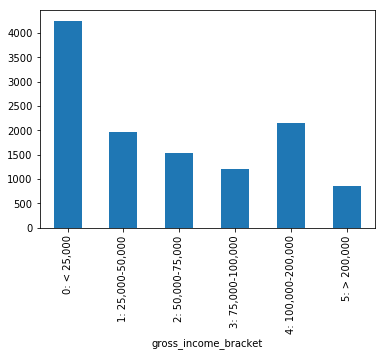

In [272]:
ca_tax_returns.loc['91307']['tax_returns_2007'].plot(kind='bar')